In [1]:
from zipfile import ZipFile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'archive.zip'

with ZipFile(file_path, 'r') as zip:
    zip.printdir()

File Name                                             Modified             Size
insurance.csv                                  2019-09-27 17:19:14        55628


In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### EDA

In [8]:
for i in df.select_dtypes(include=object):
    print(df[i].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [9]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [10]:
for i in df.select_dtypes(include=object):
    print(df[i].value_counts())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [11]:
df = pd.get_dummies(df, columns=['region'], dtype=int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


### Split Dataset

In [13]:
X = df.drop(columns=['charges'])
y = df['charges']

In [46]:
train_features = X.sample(frac=.8, random_state=0)
train_target = y.sample(frac=.8, random_state=0)
test_features = X.drop(train_features.index)
test_target = y.drop(train_target.index)

### Model 1 - Baseline

In [15]:
import tensorflow as tf
from tensorflow import keras

2024-01-10 17:50:21.691352: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 17:50:21.691481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 17:50:21.747459: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 17:50:21.864343: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-10 17:50:23.008687: W tensorflow/compiler/tf2

In [23]:
model = keras.Sequential([
    keras.layers.Dense(1, activation='relu', input_dim=9),
    keras.layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.RMSprop(),
             loss=keras.losses.MeanSquaredError(),
             metrics=keras.metrics.MeanAbsoluteError())

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.build()

In [26]:
history = model.fit(train_features, train_target, epochs=50, validation_split=.2)

Epoch 1/50


2024-01-10 17:56:23.956649: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 1/27 [>.............................] - ETA: 27s - loss: 363822208.0000 - mean_absolute_error: 13944.0859

2024-01-10 17:56:24.299488: I external/local_xla/xla/service/service.cc:168] XLA service 0xae82b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-10 17:56:24.299513: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-01-10 17:56:24.309823: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-10 17:56:24.332156: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1704920184.370558    3694 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/27 [==============================] - 1s 9ms/step - loss: 301895360.0000 - mean_absolute_error: 12712.5312 - val_loss: 363337568.0000 - val_mean_absolute_error: 14428.7061
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 301886048.0000 - mean_absolute_error: 12712.0781 - val_loss: 363325312.0000 - val_mean_absolute_error: 14428.2920
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 301874496.0000 - mean_absolute_error: 12711.5273 - val_loss: 363308928.0000 - val_mean_absolute_error: 14427.7480
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 301858016.0000 - mean_absolute_error: 12710.7734 - val_loss: 363287552.0000 - val_mean_absolute_error: 14427.0215
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 301837312.0000 - mean_absolute_error: 12709.7842 - val_loss: 363260832.0000 - val_mean_absolute_error: 14426.0898
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 301809792

Epoch 45/50
27/27 [==============================] - 0s 3ms/step - loss: 296973952.0000 - mean_absolute_error: 12529.2256 - val_loss: 357566624.0000 - val_mean_absolute_error: 14236.0049
Epoch 46/50
27/27 [==============================] - 0s 3ms/step - loss: 296792832.0000 - mean_absolute_error: 12522.4766 - val_loss: 357358240.0000 - val_mean_absolute_error: 14229.0098
Epoch 47/50
27/27 [==============================] - 0s 3ms/step - loss: 296609536.0000 - mean_absolute_error: 12515.6260 - val_loss: 357144416.0000 - val_mean_absolute_error: 14221.8262
Epoch 48/50
27/27 [==============================] - 0s 3ms/step - loss: 296424128.0000 - mean_absolute_error: 12508.6592 - val_loss: 356928000.0000 - val_mean_absolute_error: 14214.5527
Epoch 49/50
27/27 [==============================] - 0s 3ms/step - loss: 296233984.0000 - mean_absolute_error: 12501.6016 - val_loss: 356708160.0000 - val_mean_absolute_error: 14207.1602
Epoch 50/50
27/27 [==============================] - 0s 3ms/step 

### Normalization dataset

In [28]:
train_features = (train_features - train_features.mean()) / train_features.std()
train_target = (train_target - train_target.mean()) / train_target.std()

### Train Baseline Again

In [35]:
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_dim=9),
    keras.layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.RMSprop(),
             loss=keras.losses.MeanSquaredError(),
             metrics=keras.metrics.MeanAbsoluteError())

In [36]:
model.build()

In [37]:
history = model.fit(train_features, train_target, epochs=100, validation_split=.2)

Epoch 1/100
27/27 [==============================] - 1s 7ms/step - loss: 0.9206 - mean_absolute_error: 0.7626 - val_loss: 0.8133 - val_mean_absolute_error: 0.7008
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.7277 - mean_absolute_error: 0.6642 - val_loss: 0.6609 - val_mean_absolute_error: 0.6236
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5908 - mean_absolute_error: 0.5863 - val_loss: 0.5373 - val_mean_absolute_error: 0.5511
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4862 - mean_absolute_error: 0.5178 - val_loss: 0.4434 - val_mean_absolute_error: 0.4917
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4036 - mean_absolute_error: 0.4604 - val_loss: 0.3699 - val_mean_absolute_error: 0.4444
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3445 - mean_absolute_error: 0.4197 - val_loss: 0.3208 - val_mean_absolute_error: 0.4115
Epoch 7/100
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.1394 - mean_absolute_error: 0.2282 - val_loss: 0.1427 - val_mean_absolute_error: 0.2359
Epoch 52/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1394 - mean_absolute_error: 0.2258 - val_loss: 0.1422 - val_mean_absolute_error: 0.2393
Epoch 53/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1387 - mean_absolute_error: 0.2282 - val_loss: 0.1422 - val_mean_absolute_error: 0.2361
Epoch 54/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1384 - mean_absolute_error: 0.2262 - val_loss: 0.1423 - val_mean_absolute_error: 0.2379
Epoch 55/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1381 - mean_absolute_error: 0.2254 - val_loss: 0.1420 - val_mean_absolute_error: 0.2429
Epoch 56/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1378 - mean_absolute_error: 0.2296 - val_loss: 0.1409 - val_mean_absolute_error: 0.2369
Epoch 57/100
27/27 [=========

In [47]:
test_features = (test_features - test_features.mean()) / test_features.std()
test_target = (test_target - test_target.mean()) / test_target.std()

In [49]:
model.evaluate(test_features, test_target)

9/9 [==============================] - 0s 2ms/step - loss: 0.2178 - mean_absolute_error: 0.2818


[0.21783176064491272, 0.28175538778305054]

In [41]:
test_predictions = model.predict(test_features).flatten()

9/9 [==============================] - 0s 1ms/step


In [42]:
test_prediction

array([ 1.742164  ,  1.6178961 , -0.38367596,  0.26171672, -1.0172569 ,
       -0.2813934 ,  0.04905136,  0.24191128, -0.57392275, -0.44166386,
        1.1723746 , -0.40469623,  0.19633989,  0.15151934,  0.11621048,
        2.1246874 ,  1.9642326 , -0.09915227,  0.01318644, -0.68323296,
        2.291663  ,  0.34498316,  0.13555218, -0.85341907,  0.01700681,
        0.04543997, -0.8572168 ,  1.6946208 , -0.1453066 , -0.6284266 ,
       -0.1958055 , -1.1413438 , -1.1778283 ,  1.690646  , -0.9181876 ,
       -0.3921433 , -0.67916393, -0.57269263, -0.67416215, -0.5497073 ,
       -0.88160634, -0.36006796, -0.06921966, -0.6112981 , -0.28433385,
        0.05921472, -0.29738927,  1.7798194 ,  0.9319198 , -0.41365033,
       -0.56079525, -0.10813618, -0.18312858, -0.9397565 , -0.38389677,
        1.7286736 ,  2.3212845 , -0.56854534, -0.24415855, -0.8046286 ,
       -0.3173552 , -0.82748085, -0.1737033 ,  0.21597071, -1.0725689 ,
       -0.5435328 ,  0.5381863 ,  0.9347827 , -0.6382462 ,  1.38

In [45]:
test_target

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
11,1.616311,-1.067582,-0.655486,-0.929704,1.838690,-0.524557,-0.610706,1.800507,-0.616458
23,-0.430398,-1.067582,0.247501,-0.085092,1.838690,1.899258,-0.610706,-0.553327,-0.616458
24,-0.211108,0.933201,-0.377212,0.759521,-0.541836,-0.524557,1.631339,-0.553327,-0.616458
25,1.397021,-1.067582,-0.426130,1.604133,-0.541836,-0.524557,-0.610706,1.800507,-0.616458
28,-1.234463,0.933201,-2.083743,-0.085092,-0.541836,-0.524557,1.631339,-0.553327,-0.616458
...,...,...,...,...,...,...,...,...,...
1305,-1.161366,-1.067582,-0.426130,-0.929704,-0.541836,-0.524557,-0.610706,1.800507,-0.616458
1315,-1.599946,0.933201,-0.331501,-0.085092,-0.541836,1.899258,-0.610706,-0.553327,-0.616458
1318,-0.357301,0.933201,1.496926,2.448745,-0.541836,1.899258,-0.610706,-0.553327,-0.616458
1326,0.154376,-1.067582,0.399870,-0.929704,-0.541836,1.899258,-0.610706,-0.553327,-0.616458


9/9 [==============================] - 0s 994us/step


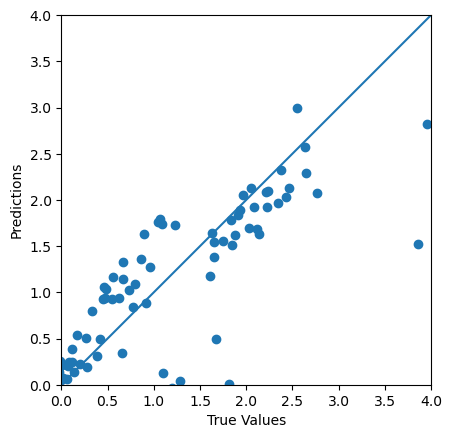

In [53]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_target, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 4]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


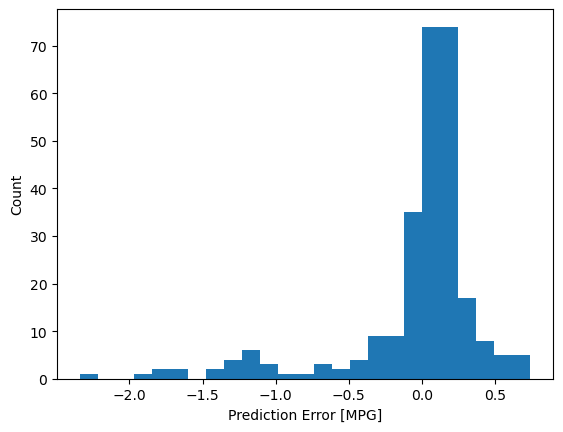

In [54]:
error = test_predictions - test_target
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')
